In [120]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [121]:
m = mp.Model()

A = m.add_var(name='Investimento A', var_type=mp.CONTINUOUS, lb=0)
B = m.add_var(name='Investimento B', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(1.05 * A + 1.08 * B)

m += A + B <= 5000
m += A >= 0.25 * 5000
m += B <= 0.5 * 5000
m += A >= 0.5 * B

m.optimize()

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Clp0000I Optimal - objective value 5325
Coin0511I After Postsolve, objective 5325, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 5325 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [122]:
print(f"Quantidade investida em A: {A.x:.4f}")
print(f"Quantidade investida em B: {B.x:.4f}")
print(f"Max return: {m.objective_value}")

Quantidade investida em A: 2500.0000
Quantidade investida em B: 2500.0000
Max return: 5325.0


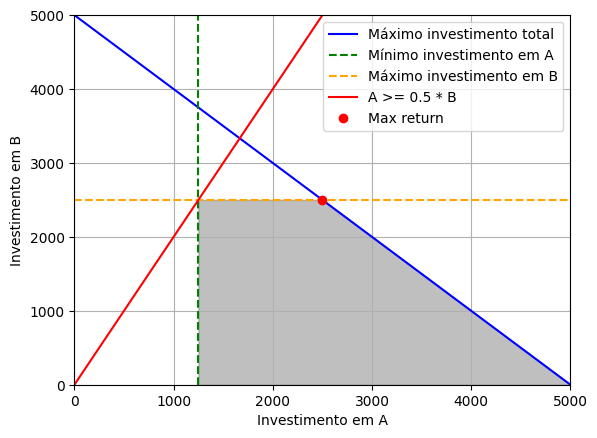

In [123]:
x = np.linspace(0, 5000, 5000)

r1 = 5000 - x
plt.plot(x, r1, color='blue', label="Máximo investimento total")

r2 = 0.25 * 5000
plt.axvline(x=r2, color='green', linestyle="--", label="Mínimo investimento em A")

r3 = 0.5 * 5000
plt.axhline(y=r3, color='orange', linestyle="--", label="Máximo investimento em B")

r4 = 2 * x
plt.plot(x, r4, color='red', label="A >= 0.5 * B")

plt.xlim(0, 5000)
plt.ylim(0, 5000)

plt.xlabel("Investimento em A")
plt.ylabel("Investimento em B")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, 0, np.minimum(np.minimum(r3, r1), r4), where=((x >= r2)), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()